In [1]:
pip install mlfinlab

     |████████████████████████████████| 851 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 10.1 MB 15.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.6 MB 34.5 MB/s eta 0:00:01
ERROR: osmnx 0.15.1 has requirement geopandas>=0.7, but you'll have geopandas 0.6.3 which is incompatible.
ERROR: hypertools 0.6.2 has requirement scikit-learn<0.22,>=0.19.1, but you'll have scikit-learn 0.23.1 which is incompatible.
ERROR: datashader 0.11.0 has requirement numba<0.49,>=0.37.0, but you'll have numba 0.49.1 which is incompatible.
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.3
    Uninstalling pandas-1.0.3:
      Successfully uninstalled pandas-1.0.3
  Attempting uninstall: numba
    Found existing installation: numba 0.48.0
    Uninstalling numba-0.48.0:
      Successfully uninstalled numba-0.48.0
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=53f95fb4c4535171aee7ffc2726c83a2ffe246cffe340408872b4fd3f49870b5
  Stored in directory: /root/.cache/pip/wheels/28/79/3c/08a301b673366fe664fe2853e136eb2acc1bb752045c11c6a1
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=a95db36c5dbae0fa7fe4a350fd91534a5d350db00a71e2d25d3bdd30124e697e
  Stored in directory: /root/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking
Note: you may need to restart the kernel to use updated packages.


# Below user can choose the 1)ticker 2)Period 3) Interval

In [114]:
import yfinance as yf
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "^NSEBANK",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "1y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


In [115]:
import pandas as pd
import numpy as np
from mlfinlab.structural_breaks import (get_chu_stinchcombe_white_statistics,
                                        get_chow_type_stat, get_sadf)

In [116]:

bars = data
bars['close'] = bars['Close']
bars.head()

Open          High           Low         Close  Volume  \
Date                                                                         
2019-07-16  30532.650391  30632.150391  30430.150391  30570.800781       0   
2019-07-17  30622.250000  30799.300781  30570.050781  30735.500000       0   
2019-07-18  30705.800781  30768.099609  30379.000000  30430.599609       0   
2019-07-19  30515.099609  30537.650391  29705.900391  29770.349609       0   
2019-07-22  29617.050781  29635.150391  29194.099609  29284.949219  339800   

                   close  
Date                      
2019-07-16  30570.800781  
2019-07-17  30735.500000  
2019-07-18  30430.599609  
2019-07-19  29770.349609  
2019-07-22  29284.949219

In [118]:
d= bars['close']
log= np.log(d)

In [119]:
#Default min_length = 20, lags = 5.  
sadf = get_sadf(log,model = 'linear', add_const=True, min_length=20, lags=5)  


2020-07-16 12:28:10.475368 100.0% _sadf_outer_loop done after 0.02 minutes. Remaining 0.0 minutes.


# we need to display the below two graphs to user

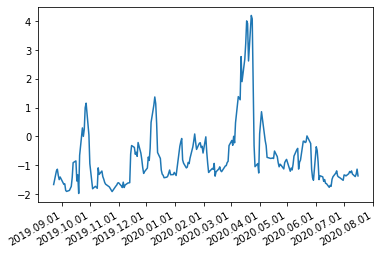

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates


# build the figure
fig, ax = plt.subplots()
sns.lineplot(data = sadf,  ax=ax)

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()

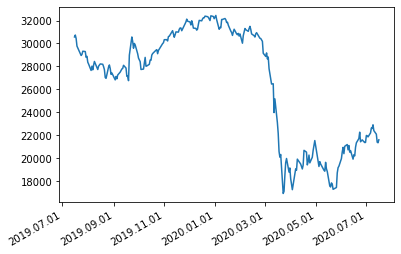

In [121]:
fig, ax = plt.subplots()
sns.lineplot(data = data.Close,  ax=ax)

# assign locator and formatter for the xaxis ticks.
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

# put the labels at 45deg since they tend to be too long
fig.autofmt_xdate()
plt.show()